# Kode

## Pakker og annet lurt

In [151]:
# Denne koden gjør at jeg kan kjøre r-kernels i et python-dokument enkelt
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [152]:
%%R
# Laster pakker i r
library(dplyr)
library(readr)
library(ggplot2)

In [153]:
#Laster pakker i python
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Datavask i R

In [154]:
%%R

# Laster og vasker data i r, for så å lagre i csv så jeg kan hente det opp i python

# Laster inn datasett
df_2021 <- read_csv("/content/NSD2995-V2-2.csv")
df_2022 <- read_csv("/content/NSD3106-V1-2.csv")

# Gjør at alle kolonner har små bokstaver siden det er forskjell mellom de to datasettene
names(df_2021) <- tolower(names(df_2021))
names(df_2022) <- tolower(names(df_2022))

# Henter relevant data
relevant_columns <- c("alder", "tilfreds", "mening1", "optim", "fornhelsf", "fornhelsp", "hscl5a", "hscl_f")

df_2021_clean <- df_2021 %>% select(all_of(relevant_columns))
df_2022_clean <- df_2022 %>% select(all_of(relevant_columns))


# Filter dataen så vi kun får faktiske svar
df_2021_filtered <- df_2021_clean %>%
  filter(between(tilfreds, 0, 10),
         between(mening1, 0, 10),
         between(optim, 0, 10),
         between(fornhelsf, 0, 10),
         between(fornhelsp, 0, 10),
         between(hscl5a, 1, 4),
         between(hscl_f, 1, 4))

df_2022_filtered <- df_2022_clean %>%
  filter(between(tilfreds, 0, 10),
         between(mening1, 0, 10),
         between(optim, 0, 10),
         between(fornhelsf, 0, 10),
         between(fornhelsp, 0, 10),
         between(hscl5a, 1, 4),
         between(hscl_f, 1, 4))

# Lagrer i csv
write_csv(df_2021_filtered, "/content/df_2021_clean.csv")
write_csv(df_2022_filtered, "/content/df_2022_clean.csv")


Rows: 17561 Columns: 294
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr   (5): VIRK_NACE1_SN07, ARB_YRKE_STYRK08, fylke, sentralitet, intdato
dbl (289): lnr, what, alder, Tilfreds, Mening1, Optim, Mening2, Swls1, Swls2...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 15148 Columns: 306
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr   (5): VIRK_NACE1_SN07, ARB_YRKE_STYRK08, fylke, sentralitet, intdato
dbl (301): lnr, what, alder, Tilfreds, Mening1, Optim, Swls1, Swls2, Swls3, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [155]:
%%R


# Load the datasets
df_2021 <- read_csv("/content/NSD2995-V2-2.csv")
df_2022 <- read_csv("/content/NSD3106-V1-2.csv")

# Convert column names to lower case for consistency
names(df_2021) <- tolower(names(df_2021))
names(df_2022) <- tolower(names(df_2022))

# Select relevant columns
relevant_columns <- c("alder", "tilfreds", "mening1", "optim", "fornhelsf", "fornhelsp", "hscl5a", "hscl_f")

df_2021_clean <- df_2021 %>% select(all_of(relevant_columns))
df_2022_clean <- df_2022 %>% select(all_of(relevant_columns))

# Filter the data
df_2021_filtered <- df_2021_clean %>%
  filter(between(tilfreds, 0, 10),
         between(mening1, 0, 10),
         between(optim, 0, 10),
         between(fornhelsf, 0, 10),
         between(fornhelsp, 0, 10),
         between(hscl5a, 1, 4),
         between(hscl_f, 1, 4))

df_2022_filtered <- df_2022_clean %>%
  filter(between(tilfreds, 0, 10),
         between(mening1, 0, 10),
         between(optim, 0, 10),
         between(fornhelsf, 0, 10),
         between(fornhelsp, 0, 10),
         between(hscl5a, 1, 4),
         between(hscl_f, 1, 4))

# Define age groups
age_groups <- function(df) {
  df %>%
    mutate(age_group = case_when(
      alder >= 17 & alder <= 30 ~ "17-30",
      alder >= 31 & alder <= 45 ~ "31-45",
      alder >= 46 & alder <= 60 ~ "46-60",
      alder > 60 ~ "60+"
    ))
}

df_2021_grouped <- age_groups(df_2021_filtered)
df_2022_grouped <- age_groups(df_2022_filtered)



# Plot distributions for fornhelsf
plot_fornhelsf <- plot_by_age_group(df_2021_grouped, df_2022_grouped, "fornhelsf", "Comparison of FornhelsF by Age Group")

# Plot distributions for fornhelsp
plot_fornhelsp <- plot_by_age_group(df_2021_grouped, df_2022_grouped, "fornhelsp", "Comparison of FornhelsP by Age Group")



Rows: 17561 Columns: 294
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr   (5): VIRK_NACE1_SN07, ARB_YRKE_STYRK08, fylke, sentralitet, intdato
dbl (289): lnr, what, alder, Tilfreds, Mening1, Optim, Mening2, Swls1, Swls2...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 15148 Columns: 306
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr   (5): VIRK_NACE1_SN07, ARB_YRKE_STYRK08, fylke, sentralitet, intdato
dbl (301): lnr, what, alder, Tilfreds, Mening1, Optim, Swls1, Swls2, Swls3, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [156]:
# Laster inn data i python

# Laster inn datasett
df_2021 = pd.read_csv('/content/df_2021_clean.csv')
df_2022 = pd.read_csv('/content/df_2022_clean.csv')

## Kode til analyse

In [157]:
# Definer aldersgrupper
age_bins = [17, 31, 46, 60, 101]  # 101 for å inkludere alder 100
age_labels = ['17-30', '31-45', '46-59', '60+']

# Lager aldersgrupperinger i begge datasett
df_2021['aldersgruppe'] = pd.cut(df_2021['alder'], bins=age_bins, labels=age_labels, right=False)
df_2022['aldersgruppe'] = pd.cut(df_2022['alder'], bins=age_bins, labels=age_labels, right=False)

# Teller antall respondenter per år
respondent_counts_2021 = df_2021['aldersgruppe'].value_counts().sort_index()
respondent_counts_2022 = df_2022['aldersgruppe'].value_counts().sort_index()

# Kombinerer dataen i dataframes
respondent_counts = pd.DataFrame({
    '2021': respondent_counts_2021,
    '2022': respondent_counts_2022
})


In [158]:
# Deskriptiv statistikk
def descriptive_statistics(df, year):
    print(f"Deskriptiv statistikk for {year}")
    print(df.describe())

In [159]:
# LAgre til csv
def save_descriptive_statistics(df, year):
    desc_stats = df.describe()
    desc_stats.to_csv(f'descriptive_statistics_{year}.csv')

save_descriptive_statistics(df_2021, 2021)
save_descriptive_statistics(df_2022, 2022)

In [160]:

# Distribusjon
def plot_distribution(df, variable, year):
    plt.figure(figsize=(10, 6))
    sns.histplot(df[variable], kde=True)
    plt.title(f'Distribusjon av {variable} i {year}')
    plt.xlabel(variable)
    plt.ylabel('Frekvens')
    plt.show()

In [161]:

# Define the function to plot by age group
def plot_by_age_group(df1, df2, variable, title):
    # Add year column
    df1['year'] = '2021'
    df2['year'] = '2022'

    # Combine the datasets
    df_combined = pd.concat([df1, df2])

    # Create age groups
    df_combined['aldersgruppe'] = pd.cut(df_combined['alder'], bins=age_bins, labels=age_labels, right=False)

    # Plotting
    g = sns.FacetGrid(df_combined, col="aldersgruppe", hue="year", sharex=True, sharey=False)
    g.map(sns.kdeplot, variable, common_norm=False, alpha=0.5)
    g.add_legend()
    g.set_axis_labels(variable, 'Densitet')
    g.fig.suptitle(title)
    plt.subplots_adjust(top=0.9)
    plt.show()

In [162]:

# Densityplot
def compare_years(df1, df2, variable):
    plt.figure(figsize=(10, 6))
    sns.kdeplot(df1[variable], fill=True, label=f'{variable} i 2021')
    sns.kdeplot(df2[variable], fill=True, label=f'{variable} i 2022')
    plt.title(f'Sammenligning av {variable} Mellom 2021 og 2022')
    plt.xlabel(variable)
    plt.ylabel('Densitet')
    plt.legend()
    plt.show()

In [163]:
# Laster inn data i python

# Laster inn datasett
df_2021 = pd.read_csv('/content/df_2021_clean.csv')
df_2022 = pd.read_csv('/content/df_2022_clean.csv')

def correlation_matrix(df, year):
    plt.figure(figsize=(12, 8))
    correlation = df.corr()
    sns.heatmap(correlation, annot=True, cmap='coolwarm')
    plt.title(f'Korrelasjonsmatrise {year}')
    plt.show()

# Prosjektoppgave
SOK-1005 Datavitenskap for Økonomer

Kand.nr. 36


# Introduksjon til oppgaven og Livskvalitetsundersøkelsen

I denne oppgaven skal jeg bruke data fra Livskvalitetsundersøkelsen 2021 og 2022 for å identifisere eventuelle endringer og mønstre som kan fortelle oss noe om samfunnets utvikling og velvære. Med fokus på å anvende datavitenskalpelige metoder og samfunnsøkonomiske teorier for å utforske sammenhengene mellom sosioøkonomiske faktorer og livskvalitet, skal jeg se på hvordan forholdene kan ha endret seg fra det ene året til det neste.

Jeg har valgt å undersøke hvordan tilfredsheten med fysisk og psykisk helse har endret seg fra 2021 til 2022 blant den norske befolkningen, i tillegg til å se på noen faktorer som kan spille inn under dette.

## Hva er livskvalitetsundersøkelsen
Livskvalitetsundersøkelsen er en nasjonal undersøkelse utført av Statistisk sentralbyrå (SSB) på oppdrag fra Helsedirektoratet for å samle data om befolkningens livskvalitet. Hovedformålet er å få innsikt i livskvaliteten til den norske befolkningen og å identifisere forskjeller mellom ulike grupper for slik å kunne bidra til å forstå og forbedre livskvaliteten i Norge ved å gi grunnlag for politikkutforming og samfunnsplanlegging.

## Covid-19 og Livskvalitetsundersøkelsen/datamaterialet
De to datasettene jeg har fått utdelt i oppgaven kommer fra undersøkelser gjort i 2021 og 2022. Spesielt undersøkelsen fra 2021 tenker jeg intuitvt vil bære preg av de pågående Corona-restriksjonene den norske befolkning var under på den tiden. I dokumentasjonsnotatet fra 2021 nevnes det at nedstengningen kan ha påvirket svarene som ble gitt, og at resultatene derfor må tolkes med forsiktighet. [pdf.2021]

## Fokusområder

Min analyse fokuserer på følgende hovedspørsmål:

- FornHelsF - Hvor fornøyd er du med din fysiske helse?
- FornHelsP - Hvor fornøyd er du med din psykiske helse?

Videre vil jeg utføre en korrelasjons- og regresjonsanalyse for å undersøke forholdet mellom disse variablene og andre livskvalitetsindikatorer:

- Alder - Alder ved inngang til året
- Tilfreds - Alt i alt, hvor fornøyd er du med livet ditt?
- Mening1 - Alt i alt, i hvilken grad opplever du at det du gjør i livet er meningsfylt?
- Optim - Alt i alt, hvor fornøyd tror du at du vil være med livet ditt om fem år fra nå?
- HSCL5a - Nervøsitet eller indre uro
- HSCL_f - Plutselig frykt uten grunn

Jeg nalysere dataene for hele respondentutvalget, og etter fire aldersgrupper: 17-30, 31-45, 46-60, og 60+. Dette vil gjøre det mulig å identifisere eventuelle aldersspesifikke trender og forskjeller i helsefornøydhet og relaterte livskvalitetsaspekter.

Jeg håper at denne analysen kan gi verdifull innsikt i hvordan tilfredshet med fysisk og psykisk helse har endret seg i løpet av siste tiden av pandemien og året etter.

# Analyse

## Demografiske endringer

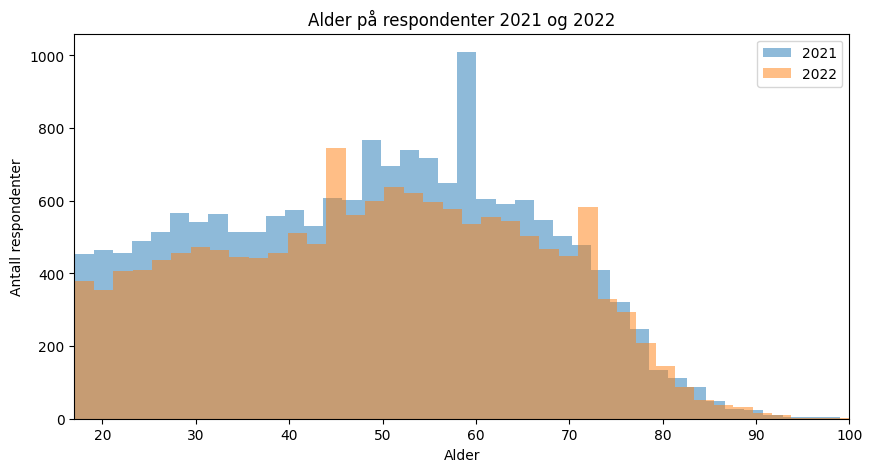

In [164]:
plt.figure(figsize=(10, 5))
plt.hist(df_2021['alder'], bins=40, alpha=0.5, label='2021')
plt.hist(df_2022['alder'], bins=40, alpha=0.5, label='2022')
plt.xlim(17, 100)  # Set x-axis limits
plt.title('Alder på respondenter 2021 og 2022')
plt.xlabel('Alder')
plt.ylabel('Antall respondenter')
plt.legend()
plt.show()

Vi ser her en oversikt over aldergruppene til respondentene, som vi ser har det vært en liten endring fra 2021 til 2022.

In [165]:
print(respondent_counts)

              2021  2022
aldersgruppe            
17-30         3199  2701
31-45         4147  3481
46-59         4850  4125
60+           5091  4601


In [166]:
descriptive_statistics(df_2021, 2021)

Deskriptiv statistikk for 2021
              alder      tilfreds       mening1         optim     fornhelsf  \
count  17287.000000  17287.000000  17287.000000  17287.000000  17287.000000   
mean      48.681263      6.754671      6.963325      7.470701      6.500029   
std       16.983572      2.224481      2.244393      2.014050      2.245179   
min       17.000000      0.000000      0.000000      0.000000      0.000000   
25%       35.000000      5.000000      6.000000      7.000000      5.000000   
50%       49.000000      7.000000      7.000000      8.000000      7.000000   
75%       62.000000      8.000000      9.000000      9.000000      8.000000   
max       99.000000     10.000000     10.000000     10.000000     10.000000   

          fornhelsp        hscl5a        hscl_f  
count  17287.000000  17287.000000  17287.000000  
mean       7.048707      1.759993      1.306994  
std        2.431938      0.816752      0.626361  
min        0.000000      1.000000      1.000000  
25%    

Vi ser her deskriptiv statistikk fra 2021 for å få en generell oversikt over dataene fra det året jeg skal analysere.

Vi ser at respondentene har rapportert relativt høye nivåer av meining i livet, optimisme, og tilfredshet med både fysisk og psykisk helse. Samtidig forteller standardavviket oss at det er noe forskjeller i hvordan respondentene svarer som kanskje ikke kommer frem om man tar gjennomsnittene av svarene.

In [167]:
descriptive_statistics(df_2022, 2022)

Deskriptiv statistikk for 2022
              alder      tilfreds       mening1         optim     fornhelsf  \
count  14908.000000  14908.000000  14908.000000  14908.000000  14908.000000   
mean      49.222364      6.858599      7.081164      7.379058      6.340220   
std       17.146698      2.219430      2.197833      2.085818      2.286696   
min       17.000000      0.000000      0.000000      0.000000      0.000000   
25%       35.000000      5.000000      6.000000      6.000000      5.000000   
50%       50.000000      7.000000      7.000000      8.000000      7.000000   
75%       63.000000      8.000000      9.000000      9.000000      8.000000   
max      100.000000     10.000000     10.000000     10.000000     10.000000   

          fornhelsp        hscl5a        hscl_f  
count  14908.000000  14908.000000  14908.000000  
mean       7.069694      1.835122      1.331030  
std        2.463425      0.843918      0.641542  
min        0.000000      1.000000      1.000000  
25%    

Vi ser her deskriptiv statistikk fra 2022.

Vi ser her at det har vært noen små, men positive, gjennomsnittelige endringer i variablene fra 2021:
 - Den generelle livstilfredsheten (tilfreds) virker å ha økt minimalt fra 6,75 i 2021 til 6,86 i 2022.
 - Det virker som om flere finner livet meningsfylt (mening1) ved at den har økt fra 6,96 til 7,08.
 - Optimisme for fremtiden (optim) har dessverre hatt en liten nedgang fra 7,47 til 7,38, som indikerer at folk er noe mindre optimistiske for fremtiden i 2022 enn i 2021
 - Nedgangen i tilfredshet med fysisk helse (fornhelsf) fra 6,50 til 6,34 kan blandt annet reflektere langtidseffekter etter pandemien.
 - Det er også en økning i både nervøsitet (hscl5a) og plutselig frykt (hscl_f) som kan indikere at flere opplever fysisk stress.

##Oppsummering så langt

Aldersfordelingen blant respondentene var relativt konsistent over de to årene, med en liten nedgang i antall yngre respondenter (17-30 år) i 2022 sammenlignet med 2021. Gjennomsnittsalderen for respondentene økte dermed noe fra 48,68 år i 2021 til 49,22 år i 2022.

Generell Tilfredshet og Opplevd Mening med Livet:

  - Generell livstilfredshet og opplevelsen av mening i livet viste en liten økning fra 2021 til 2022 på tvers av alle aldersgrupper:
      - Livstilfredshet (tilfreds) økte fra et gjennomsnitt på 6,75 i 2021 til 6,86 i 2022.
      - Opplevd mening i livet (mening1) økte fra et gjennomsnitt på 6,96 i 2021 til 7,08 i 2022.

Fysisk Helse:

  - Tilfredshet med fysisk helse (fornhelsf) sank generelt for respondentene fra 6,50 i 2021 til 6,34 i 2022.
    - Denne nedgangen var spesielt sterk blant yngre og voksne respondenter.
    - Den høyeste tilfredsheten med fysisk helse ble observert blant eldre respondenter (60+ år).

Psykisk Helse:

  - Tilfredshet med psykisk helse (fornhelsp) viste en liten økning fra 7,05 i 2021 til 7,07 i 2022.
    - Til tross for den generelle økningen, rapporterte yngre og voksne respondenter lavere nivåer av tilfredshet med psykisk helse i 2022 sammenlignet med 2021.

Psykologisk Velvære:

  - Følelser av nervøsitet (hscl5a) og plutselig frykt (hscl_f) forble relativt stabile mellom de to årene, selv om yngre respondenter rapporterte høyere nivåer av disse symptomene.
      - Eldre respondenter rapporterte mindre nervøsitet og plutselig frykt sammenlignet med yngre respondenter.

## Sjekker korrelasjon mellom valgte variabler 2021

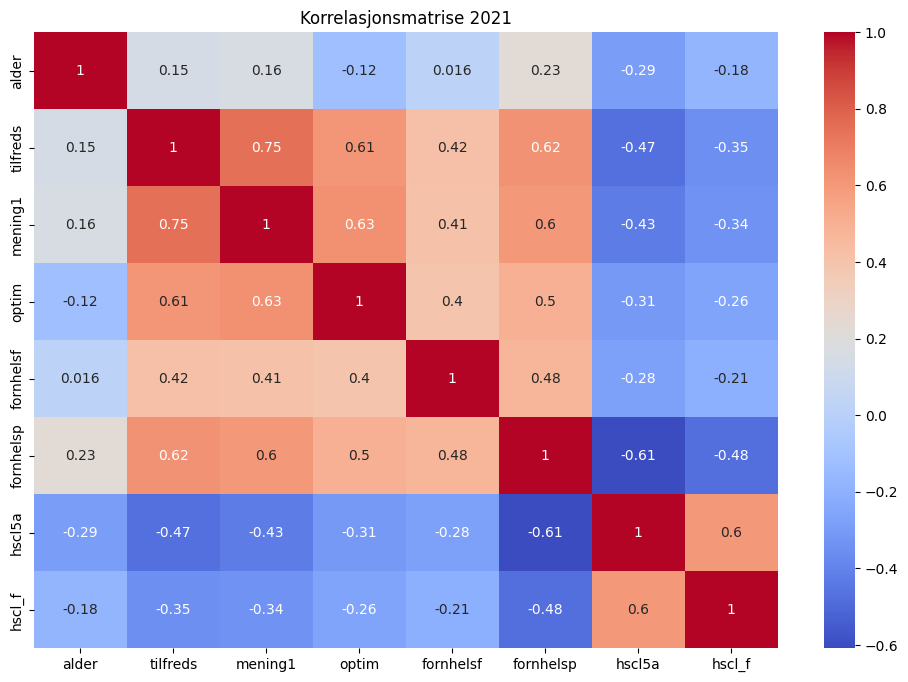

In [168]:
correlation_matrix(df_2021, 2021)

I denne korrelasjonsmatrisen for 2021 ser vi noen av disse sammenhengene:

   - Alder:
        - Alder har en svak positiv korrelasjon med fornhelsp (0.23), noe som betyr at eldre rapporterer noe høyere tilfredshet med psykisk helse i forhold til resten.
        - Alder har en negativ korrelasjon med hscl5a (-0.29) og hscl_f (-0.18), som antyder at eldre også rapporterer mindre nervøsitet og plutselig frykt. Dette indikerer at eldre generelt har mindre uro og mer tilfredshet med psykisk helse.

   - Tilfredshet (tilfreds):
        - Tilfredshet med livet virker sterkt korrelert med meningsfullhet (0.75), optimisme (0.61), fornhelsf (0.42), og fornhelsp (0.62). Dette betyr at generell tilfredshet med livet er nært knyttet til hvordan man opplever mening, optimisme, og helsetilfredshet.
        - Den har en negativ korrelasjon med hscl5a (-0.47) og hscl_f (-0.35), som antyder at lavere nivåer av nervøsitet og frykt bidrar til høyere generell tilfredshet.

   - Psykisk helse (fornhelsp):
        - Fornhelsp viser sterk negativ korrelasjon med hscl5a (-0.61) og hscl_f (-0.48), som forventet, da bedre psykisk helse innebærer lavere nivåer av nervøsitet og frykt.

## Sjekker korrelasjon mellom valgte variabler 2022

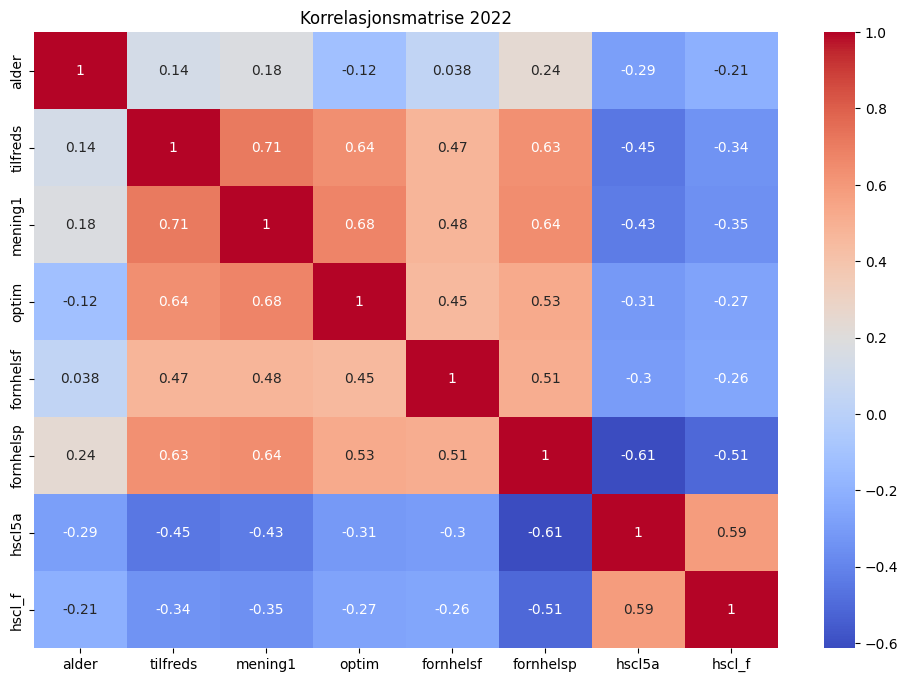

In [169]:
correlation_matrix(df_2022, 2022)

Korrelasjonsmatrise for 2022

  - Alder:
      - Korrelasjonen mellom alder og fornhelsp (0.24) og mellom alder og hscl5a (-0.29) samt hscl_f (-0.21) er lignende som i 2021, men noe sterkere. Dette betyr at eldre personer fortsatt opplever bedre psykisk helse og mindre nervøsitet og frykt i 2022.

  - Tilfredshet (tilfreds):
      - Korrelasjonen med meningsfullhet (0.71), optimisme (0.64), fornhelsf (0.47), og fornhelsp (0.63) viser fortsatt en sterk sammenheng mellom generell livstilfredshet og andre aspekter av livskvalitet.
      - Negativ korrelasjon med hscl5a (-0.45) og hscl_f (-0.34) fortsetter trenden fra 2021.

  - Psykisk helse (fornhelsp):
      - Fornhelsp har fortsatt en sterk negativ korrelasjon med hscl5a (-0.61) og hscl_f (-0.51), noe som igjen bekrefter at bedre psykisk helse er assosiert med lavere nivåer av nervøsitet og plutselig frykt.

Implikasjoner av korrelasjonsmatrisene:

  - Alder og Psykisk Helse:
      - Den positive korrelasjonen mellom alder og psykisk helse, samt den negative korrelasjonen mellom alder og nervøsitet/frykt, tyder på at de eldre kan ha utviklet bedre mestringsstrategier eller støttenettverk som bidrar til bedre psykisk helse. Alternativt at de vurderer sin egen psykiske helse som bedre enn yngre grupper gjør. Likevel kan implikasjonen fra dette være at det er behov for tiltak som fokuserer på å styrke psykisk helse for yngre aldersgrupper.

  - Generell Tilfredshet og Helse:
      - Den sterke sammenhengen mellom generell tilfredshet med livet og tilfredshet med både fysisk og psykisk helse understreker hvor viktig begge typene for helse er. Implikasjonen kan være at politikker som støtter helsetjenester, fremmer fysisk aktivitet, og reduserer psykisk stress sannsynligvis vil kunne øke generell livstilfredshet.

  - Mental Helse og Uro/Frykt:
      - Den sterke negative korrelasjonen mellom psykisk helse og nivåer av nervøsitet og plutselig frykt indikerer at det eksisterer behov for tiltak rettet mot å redusere angst og stress i befolkningen. For eksempel tilgang til mental helsehjelp og former for stressmestringsprogrammer kan ha effekt på å forbedre livskvaliteten.

  - Pandemieffekter:
      - Sammenligning av korrelasjoner mellom 2021 og 2022 viser små endringer, noe som kan reflektere en viss stabilitet i de psykologiske og helse-relaterte reaksjonene på pandemien over tid. Dette kan indikere at pandemiens effekter på mental og fysisk helse har blitt en stabil del av livene til mange, noe som krever langsiktig strategisk planlegging for å adressere.

## Endringer mellom 2021 og 2022 i hvor fornøyd respondentene er med sin fysiske helse.

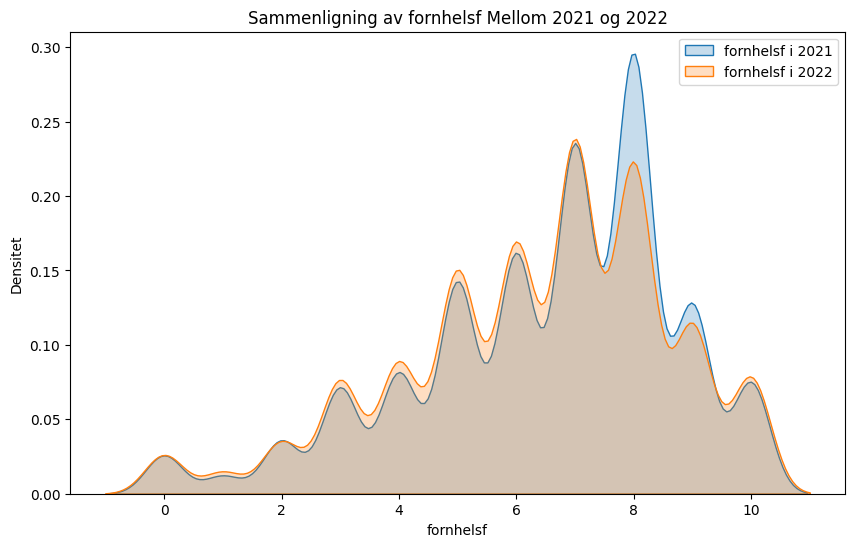

In [170]:
compare_years(df_2021, df_2022, 'fornhelsf')

Grafen viser tilfredshet med fysisk helse (fornhelsf) i 2021 og 2022.

Observasjoner:

  - Grafen viser en sammenligning av densiteten for fornhelsf i 2021 (blå kurve) og 2022 (oransje kurve).
  - Begge årene viser flere topper (2021 med en markant høyere topp rundt 8 enn 2022), noe som betyr at tilfredsheten med fysisk helse ikke er jevnt fordelt.

Tolkninger:

  - Den høyere toppen i 2021 rundt 8 kan bety at flere mennesker var mer fornøyde med sin fysiske helse i 2021 sammenlignet med 2022.
  - Reduksjonen i toppen i 2022 kan også være korrelert med en generell nedgang i tilfredshet med fysisk helse, muligens påvirket av langvarige effekter av COVID-19-pandemien, inkludert forsinket tilgang til helsetjenester eller langtidseffekter av sykdommen.

## Endringer mellom 2021 og 2022 i hvor fornøyd respondentene er med sin psykiske helse

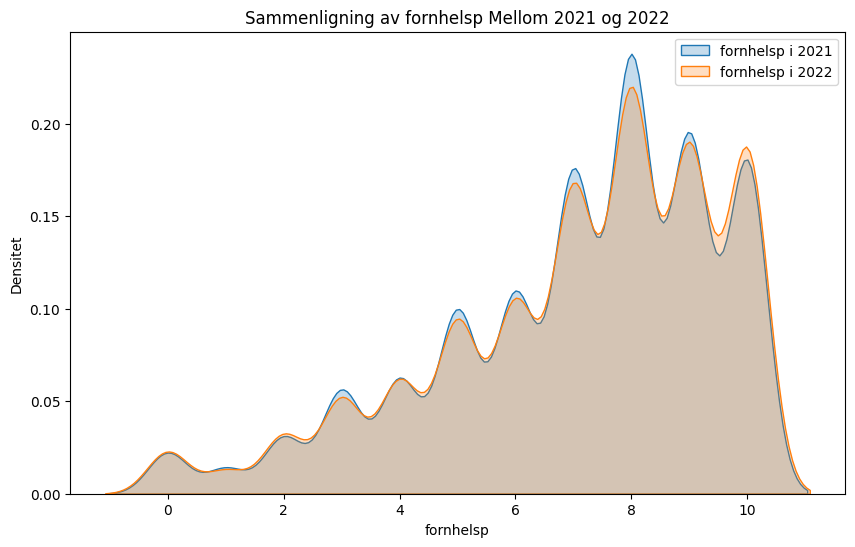

In [171]:
compare_years(df_2021, df_2022, 'fornhelsp')

Grafen viser tilfredshet med psykisk helse (fornhelsp) 2021 vs. 2022


Observasjoner:

 - Grafen viser en sammenligning av densiteten for fornhelsp i 2021 (blå kurve) og 2022 (oransje kurve).
  - Begge årene har en markant topp rundt verdiene 8 og 9, med en liten reduksjon i 2022 sammenlignet med 2021.
      - Som med fysisk helse, er det flere topper, som indikerer at det er grupper med ulik tilfredshet med psykisk helse.

Tolkninger:

  - Den lille reduksjonen i toppen i 2022 kan tyde på en liten nedgang i tilfredshet med psykisk helse.
    - Denne nedgangen kan skyldes flere faktorer, som økt stress og angst som følge av pandemien, økonomisk usikkerhet, eller redusert sosial kontakt.

Implikasjoner av grafene:

  - Helseinvesteringer: Nedgangen i tilfredshet med både fysisk og psykisk helse kan indikere behov for økte investeringer i helsesektoren, spesielt for å adressere langtidseffektene av pandemien.

  - Psykisk Helse: Nedgangen i tilfredshet med psykisk helse kan si at det er behov for større fokus på mental helse i samfunnsplanleggingen fremover. Økte ressurser til psykisk helsevern og forebyggende tiltak kan bøte på trenden.

  - Helsetjenester: Reduksjonen i tilfredshet med fysisk helse kan også være et tegn på at tilgangen til helsetjenester har vært for dårlig under pandemien. Forbedringer i helsetjenester, både i kapasitet og tilgjengelighet, kan være ha en effekt her.

  - Sosioøkonomiske Faktorer: Ulike grupper i samfunnet kan ha blitt påvirket forskjellig av pandemien. Dette antyder behov for mer aldersgrupperettede tiltak for å få opp tilfredsheten i befolkningen.

## Endringer fra 2021 til 2022 fordelt på aldersgrupper

In [172]:
desc_stats_2021_grouped, desc_stats_2022_grouped

(               alder                                 tilfreds                  \
                 mean       std count min median max      mean       std count   
 age_group                                                                       
 17-30      24.223195  3.770489  3199  17   24.0  30  6.230072  2.239049  3199   
 31-45      38.102243  4.392266  4147  31   38.0  45  6.591512  2.230345  4147   
 46-59      52.498557  3.944356  4850  46   52.0  59  6.794845  2.225523  4850   
 60+        69.030642  6.700515  5091  60   68.0  99  7.178943  2.123310  5091   
 
                ... hscl5a                   hscl_f                             \
           min  ...  count min median max      mean       std count min median   
 age_group      ...                                                              
 17-30       0  ...   3199   1    2.0   4  1.541419  0.821129  3199   1    1.0   
 31-45       0  ...   4147   1    2.0   4  1.328189  0.647146  4147   1    1.0   
 46-59       0

Deskriptiv statistikk over svaralternativene, fordelt etter aldersgrupper, endringer:

  - Generell livstilfredshet
    - Det virker som om den generelle tilfredsheten har økt for alle aldersgrupper fra 2021 til 2022, mens eldre (60+) har de høyeste nivåene.
  - Helsetilfredshet:
    - Det har vært en liten nedgang i de fleste aldersgruppene i tidsperioden, men mest merkbart bland de yngre (17-30) og voksne.
  - Tilfredshet med egen psykisk helse:
    - Yngre og voksne grupper rapporterer en økning i nervøsitet og "plutselig frykt", mens de eldre har en nedgang og dermed forbedring i disse verdiene.

Generell observasjon:
Statistikken viser små men merkbare endringer i livskvaliteten og opplevd helse på tvers av aldersgruppene. Likevel kan det virke som at de eldre opprettholder eller forberer sin mentale helse bedre enn de andre gruppene.

## Endringer i hvor fornøyd respondentene er med sin fysiske helse fordelt på aldersgrupper

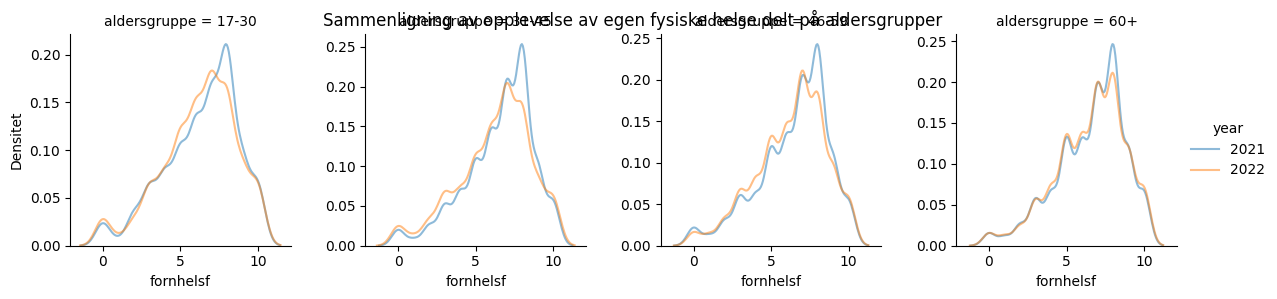

In [173]:
plot_by_age_group(df_2021, df_2022, 'fornhelsf', 'Sammenligning av opplevelse av egen fysiske helse delt på aldersgrupper')

Her ser vi et densityplot som viser respondentenes tilfredshet med egen fysisk helse (fornhelsf) for 2021 og 2022, fordelt på aldersgrupper.

Vi ser at det er en nedgang i opplevelse av egen fysisk helse fra 2021 til 2022. Nedgangen kan potensielt delvis tilskrives ettereffekter av COVID-19-pandemien, inkludert forsinket tilgang på helsetjenester eller effekter etter sykdommen.

Vi ser også at de eldre (60+) virker å i høyere grad ha opprettholdt tilfredsheten når vi sammenligner med de andre gruppene, selv om de også har en liten nedgang.

## Endringer i hvor fornøyd respondentene er med sin psykiske helse fordelt på aldersgrupper

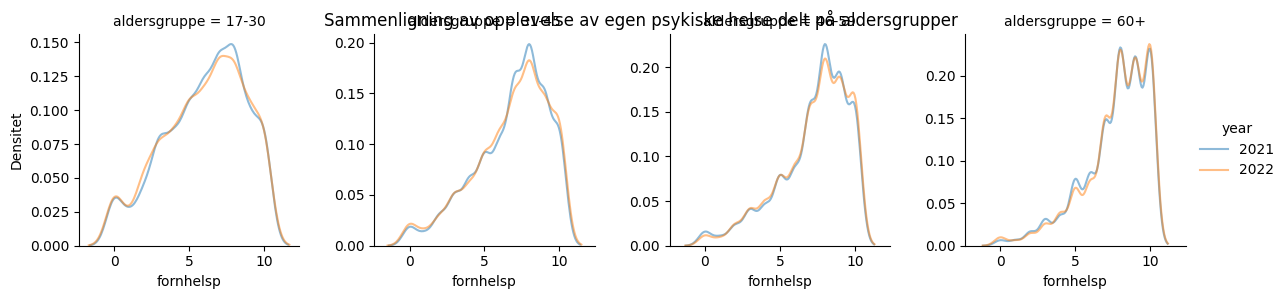

In [174]:
plot_by_age_group(df_2021, df_2022, 'fornhelsp', 'Sammenligning av opplevelse av egen psykiske helse delt på aldersgrupper')

Her ser vi et densityplot som viser respondentenes tilfredshet med egen psykiske helse (fornhelsp) for 2021 og 2022, fordelt på aldersgrupper.

Vi ser at det er en liten nedgang i opplevelsen av egen psykisk helse for alle gruppene, forutenom de som er 60+ som faktisk viser en økning i tilfredshet. Nedgangen i tilfredshet blant de andre gruppene kan for eksempel komme av økt stress og psykisk belastninger som følge av pandemien og dens ettervirkninger.

At de 60+ virker å vise en liten forbedring eller i det minste opprettholdelse av psykisk helse, kan tyde på muligens bedre satrategier for å mestre stress, eller kanskje andre former for støttenettverk.

# Oppsummering og Konklusjon

I denne oppsummeringen øknser jeg å gå over noen av hovedobservasjonene jeg har gjort i den dataen jeg valgte.

Demografiske Endringer:

  - Aldersfordelingen blant respondentene var relativt konsistent over de to årene, med en liten nedgang i antall yngre respondenter (17-30 år) i 2022 sammenlignet med 2021. Gjennomsnittsalderen for respondentene økte dermed noe fra 48,68 år i 2021 til 49,22 år i 2022.

Generell Tilfredshet og Opplevd Mening:

  - Generell livstilfredshet og opplevelsen av mening med livet viste en liten økning fra 2021 til 2022 på tvers av alle aldersgrupper:
      - Livstilfredshet (tilfreds) økte fra et gjennomsnitt på 6,75 i 2021 til 6,86 i 2022.
      - Opplevd mening i livet (mening1) økte fra et gjennomsnitt på 6,96 i 2021 til 7,08 i 2022.

Fysisk Helse:

  - Tilfredshet med fysisk helse (fornhelsf) sank generelt for respondentene fra 6,50 i 2021 til 6,34 i 2022.
    - Denne nedgangen var spesielt uttalt blant yngre og voksne respondenter.
    - Den høyeste tilfredsheten med fysisk helse ble observert blant eldre respondenter (60+ år).

Psykisk Helse:

  - Tilfredshet med psykisk helse (fornhelsp) viste en liten økning fra 7,05 i 2021 til 7,07 i 2022.
    - Til tross for den generelle økningen, rapporterte yngre og voksne respondenter lavere nivåer av tilfredshet med psykisk helse i 2022 sammenlignet med 2021.

Psykologisk Velvære:

  - Følelser av nervøsitet (hscl5a) og plutselig frykt (hscl_f) forble relativt stabile mellom de to årene, selv om yngre respondenter rapporterte høyere nivåer av disse symptomene.
      - Eldre respondenter rapporterte mindre nervøsitet og plutselig frykt sammenlignet med yngre respondenter.



I denne oppgaven har jeg analysert data fra Livskvalitetsundersøkelsen 2021 og 2022 for å identifisere eventuelle endringer og/eller mønstre som kan belyse noe om samfunnets utvikling og befolkningens velvære. Jeg har utforsketsammenhenger mellom sosioøkonomiske faktorer og livskvalitet, med spesielt fokus på tilfredshet med fysisk og psykisk helse. Vi ser at det har vært små endringer i de valgte variablene fra år til år, men i en generelt negativ retning noe som indikerer at det er behov for helse- og sosiale tiltak, i tillegg til mer observasjon og langsiktig planlegging for å endre kursen i den norske befolkningens opplevelse av egen tilværelse.

# Appendix

## Kilder

Norwegian Centre for Research Data (NSD). (2021). Livskvalitetsundersøkelsen 2021

Norwegian Centre for Research Data (NSD). (2022). Livskvalitetsundersøkelsen 2022

Strand Støren, K., & Rønning, E. (2021). Livskvalitetsundersøkelsen 2021 (Notater 2021/40). Statistisk sentralbyrå. https://www.ssb.no/sosiale-forhold-og-kriminalitet/levekar/artikler/livskvalitetsundersokelsen-2021/_/attachment/inline/f6c0d1e3-6ceb-4bf1-be8d-86403b9add28:3feb98cd7129a024ee42eb1363ef00f01a060938/NOT2021-40_web.pdf

Strand Støren, K., & Rønning, E. (2022). Livskvalitetsundersøkelsen 2022. Statistisk sentralbyrå. https://www.ssb.no/sosiale-forhold-og-kriminalitet/levekar/artikler/livskvalitetsundersokelsen-2022.dokumentasjonsnotat



## KI

KI er tatt i bruk for å hjelpe å generere grafer, streamlinje/forbedre kode til innlasting og rensking av data og hjelp til å formattere kildehenvisninger.